In [ ]:
%pip install tensorflow pandas matplotlib seaborn scikit-learn

In [ ]:
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [ ]:
data=pd.read_csv("MicrosoftStock.csv")

In [ ]:
data.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   1259 non-null   int64         
 1   date    1259 non-null   datetime64[ns]
 2   open    1259 non-null   float64       
 3   high    1259 non-null   float64       
 4   low     1259 non-null   float64       
 5   close   1259 non-null   float64       
 6   volume  1259 non-null   int64         
 7   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 78.8+ KB


In [ ]:
data.describe()

,index,date,open,high,low,close,volume
count,1259.000000,1259,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,2015-08-09 05:44:16.393963264,51.026394,51.436007,50.630397,51.063081,3.386946e+07
min,390198.000000,2013-02-08 00:00:00,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,2014-05-10 12:00:00,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,2015-08-10 00:00:00,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,2016-11-05 12:00:00,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,2018-02-07 00:00:00,95.140000,96.070000,93.720000,95.010000,2.483542e+08
std,363.586303,NaN,14.859387,14.930144,14.774630,14.852117,1.958979e+07


Plot of Opening and Closing Price of Stock over the years


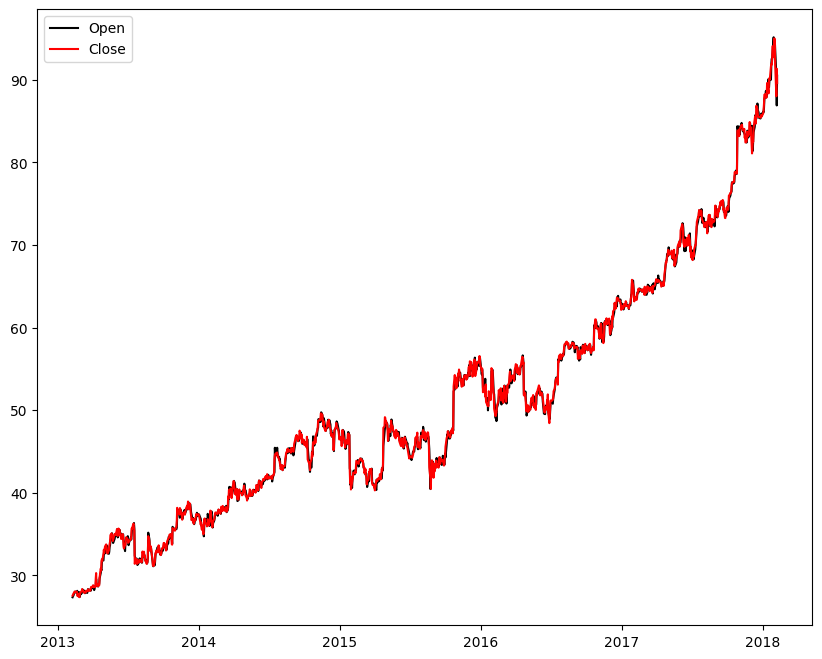

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data['date'],data['open'],label="Open",color="black")
plt.plot(data['date'],data['close'],label="Close",color="red")
plt.legend()
plt.show()


Volume of Stock over the years

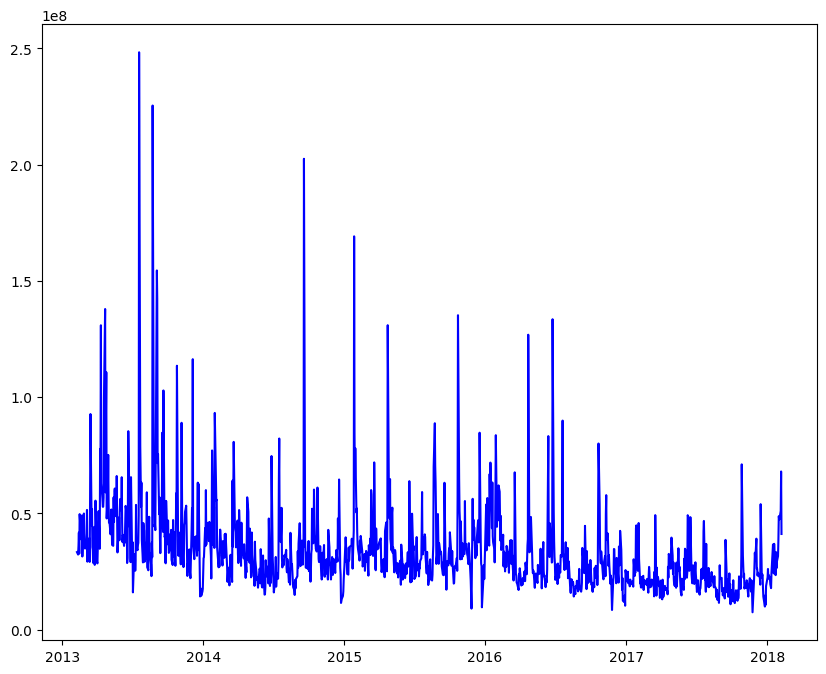

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data['date'],data['volume'],label="Open",color="blue")
plt.show()

Correlation Matrix using Heatmap

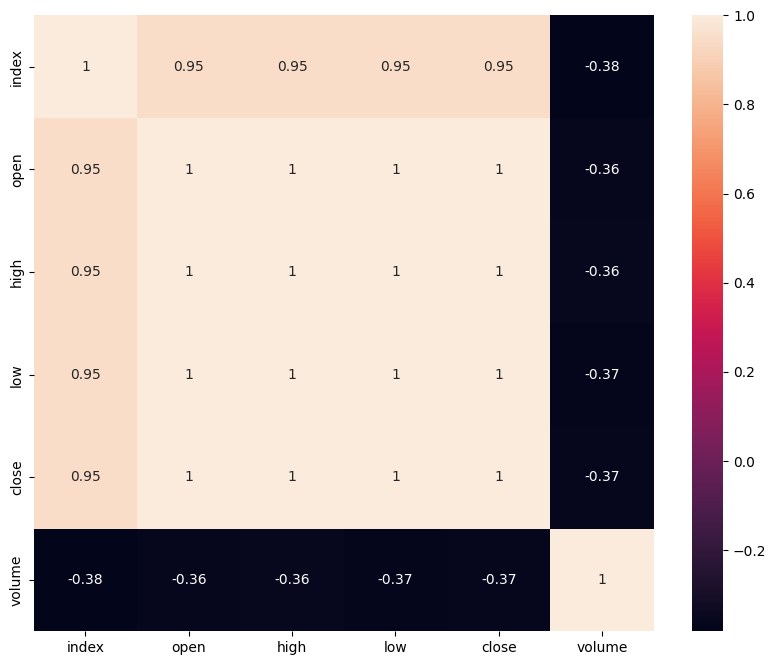

In [ ]:
raw_data=data.select_dtypes(include=["int64","float64"])
plt.figure(figsize=(10,8))
sns.heatmap(raw_data.corr(),annot=True)
plt.show()

In [ ]:
data['date']=pd.to_datetime(data['date'],format="%Y-%m-%d")
prediction=data.loc[(data['date']>datetime(2013,1,1)) & (data['date']<datetime(2018,1,1))]

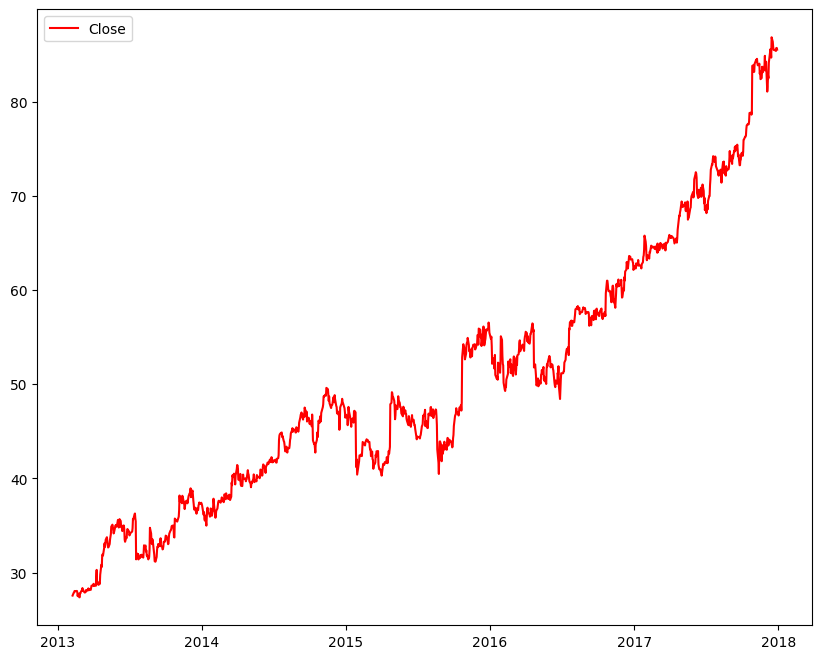

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(prediction['date'],prediction['close'],label="Close",color="red")
plt.legend()
plt.show()

In [ ]:
stock_close=data['close']
dataset=stock_close.values
training_data_len=int(np.ceil(len(dataset)*0.95))
training_data_len

1197

Preprocesses stock closing price data by scaling it and creating sequences for training an LSTM time series model.

In [ ]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset.reshape(-1,1))
training_data=scaled_data[0:training_data_len]
X_train,y_train=[],[]
for i in range(60,len(training_data)):
    X_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

Sequential Keras model using LSTM layers for time series prediction


In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.LSTM(64,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(keras.layers.LSTM(64,return_sequences=False))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()
model.compile(optimizer="adam",loss="mae",metrics=[keras.metrics.RootMeanSquaredError()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

Model Trainign using Test data

In [ ]:
training=model.fit(X_train,y_train,epochs=20,batch_size=32)
tese_data=scaled_data[training_data_len-60:]
X_test,y_test=[],dataset[training_data_len:]
for i in range(60,len(tese_data)):
    X_test.append(tese_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))



Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.3664 - root_mean_squared_error: 0.4870
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1268 - root_mean_squared_error: 0.1706
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.1393 - root_mean_squared_error: 0.1835
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.1120 - root_mean_squared_error: 0.1481
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1127 - root_mean_squared_error: 0.1522
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1118 - root_mean_squared_error: 0.1491
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.1124 - root_mean_squared_error: 0.1516
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.1035 - root_mean_squared_error: 0.1430
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.1090 - root_mean_squared_error: 0.1489
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1007 - root_mean_squared_error: 0.1369

In [ ]:
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


Stock Prediction

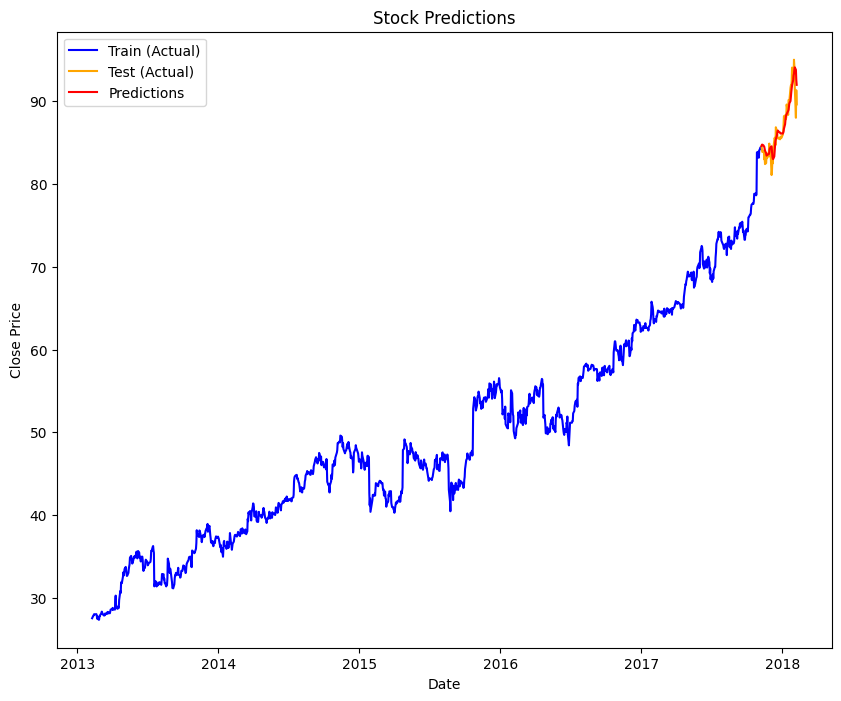

In [ ]:
train=data[:training_data_len]
test=data[training_data_len:]
test=test.copy()
test['Predictions']=predictions
plt.figure(figsize=(10,8))
plt.plot(train['date'],train['close'],label="Train (Actual)",color='blue')
plt.plot(test['date'],test['close'],label="Test (Actual)",color='orange')
plt.plot(test['date'],test['Predictions'],label="Predictions",color='red')
plt.title("Stock Predictions")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

Calcuting MAPE and R-squared for model evaluation

In [ ]:
from sklearn.metrics import r2_score

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mape = np.nan_to_num(mape, nan=0.0) #Replacing NaNs with 0

r2 = r2_score(y_test, predictions)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'R-squared: {r2:.2f}')

Mean Absolute Percentage Error (MAPE): 4.33%
R-squared: 0.85
